In [80]:
import numpy as np
# Define model
class LinearRegression:
  def __init__(self, learning_rate = 1e-3, n_iterations = 100):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.w = None

  def y_hat(self, X):
    return np.dot(self.w.T, X)

  def loss(self, yhat, y):
    return 1/self.m*np.sum((yhat-y)**2)
  
  def gradient_descent(self, X, y, yhat):
    dw = 1/self.m*np.dot(X, (yhat - y).T)
    self.w -= self.learning_rate*dw
    return self.w

  def fit(self, X, y):
    ones_X = np.ones((1, X.shape[1]))
    X = np.append(X, ones_X, axis = 0)
    self.n, self.m = X.shape
    self.w = np.zeros((self.n, 1))

    for i in range(self.n_iterations):
      yhat = self.y_hat(X)
      L = self.loss(yhat, y)
      if i%((self.n_iterations+1)//5) == 0:
        print(f'Cost at iteration {i+1} is {L}')
      
      self.w = self.gradient_descent(X, y, yhat)
    return self.w

  def predict(self, Xnew):
    ones_X = np.ones((1,Xnew.shape[1]))
    Xnew = np.append(Xnew, ones_X, axis = 0)
    self.y_predict = self.y_hat(Xnew)
    return self.y_predict

  def evaluate(self, y_predict, y_val):
    L = self.loss(y_predict, y_val)
    print(f'Val loss: {L}')
    return L

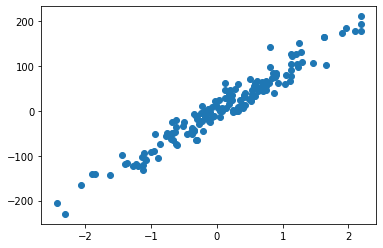

Cost at iteration 1 is 6521.818200732219
Cost at iteration 21 is 356.3185168389464
Cost at iteration 41 is 356.31849723401626
Cost at iteration 61 is 356.31849723401626
Cost at iteration 81 is 356.31849723401626
Val loss: 129.78457065410993


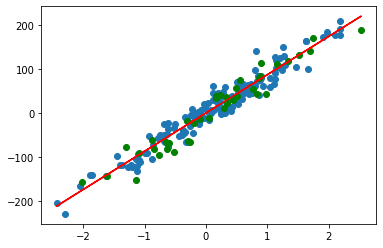

In [92]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
X, y = datasets.make_regression(n_samples = 200, n_features = 1, noise = 20, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 2)
X = X.T
X_train, X_val = X_train.T, X_val.T
y = y.reshape(1,-1)
y_train, y_val = y_train.reshape(1,-1), y_val.reshape(1,-1)
# Visualize data
plt.scatter(X_train, y_train)
plt.show()
type(X_train)
# Train model
linear_regression = LinearRegression(learning_rate = 0.5)
linear_regression.fit(X_train,y_train)
y_predict = linear_regression.predict(X_val)
eval = linear_regression.evaluate(y_predict, y_val)
# Visualize linear
y_predict_line = linear_regression.predict(X)
plt.scatter(X_train, y_train)
plt.scatter(X_val, y_val, c = 'g')
plt.plot(X.T, y_predict_line.T, c='r')
plt.show()